In [2]:
#importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading data into the dataframe
students = pd.read_csv('student_scores.csv')
df = pd.DataFrame(students)

In [4]:
# Display and checking data

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# checking for missing values in Hours

df['Hours'].isnull().sum()

0

In [6]:
# checking for missing values in Scores

df['Scores'].isnull().sum()

0

In [7]:
# converting values of scores to float 

df['Scores'] = pd.to_numeric(df['Scores'], downcast = 'float')

In [8]:
# let's learn about our data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286888
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


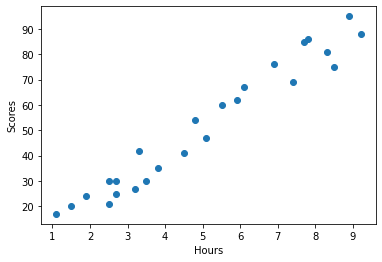

In [9]:
# Let's plot our data

x = df['Hours']
y = df['Scores']
plt.scatter(x,y)
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.show()

In [12]:
# We can see a positive relationship between hours and scores.

In [37]:
X = df.iloc[:,:1].to_numpy() #extracting hours
Y = df.iloc[:, -1].to_numpy() # extracting scores

In [38]:
# importing ML libraries and splitting 

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [40]:
# loading, fitting, training the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_Train, Y_Train)

LinearRegression()

In [41]:
# Our algorithm is ready to predict

predictions = model.predict(X_Test)

In [47]:
# Now we will compare our predictions to actual values

df2 = pd.DataFrame({"Actual Scores": Y_Test, "Predicted Scores": predictions})
df2

,Actual Scores,Predicted Scores
0,81.0,83.502444
1,30.0,27.530757
2,21.0,27.530757
3,76.0,69.992037
4,62.0,60.341746
5,25.0,29.460815
6,42.0,35.250990
7,47.0,52.621513
8,35.0,40.076135


In [48]:
# We shall be comparing our values using metrics

from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(Y_Test,predictions))

Mean Absolute Error: 4.564015037730867
